# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [4]:
medical.shape

(1338, 8)

In [5]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The std is almost the same as the mean, I feel like this range is too big. 

In [21]:
medical.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [20]:
mean = np.mean(medical.charges)
std = np.std(medical.charges)
mean, std

(13270.422265141257, 12105.484975561605)

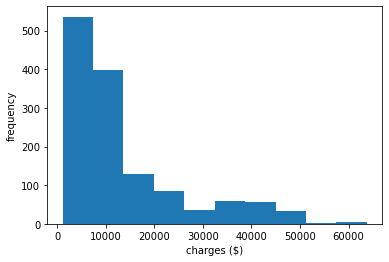

In [9]:
_ = plt.hist(medical.charges)
_ = plt.xlabel('charges ($)')
_ = plt.ylabel('frequency')

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ I think since it's random that would make it a representative sample of the population of all charges. This means that any conclusions we draw about the sample population can be transferred to the target population. Perhaps a t-test, since this is a sample and we don't know the population parameters. The sample size could be considered small, but I don't have a reference point to how many charges happen in a given time interval.  

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided because we want to know if our mean is below or above a defined boundary? I feel like you could use either. If your confidence interval of a two-sided test for the mean contains 12,000, then that would mean the True Population mean could be 12,000, which is no bueno. Alternatively, if you use a one-sided test with the "expected" population mean of 12,000, I think it would be a bit more definitive. But I'm not sure. 

Alternative: The true mean of the population is less than 12,000. 

Null: The true mean of the population from which our sample was drawn is greater than 12,000.

In [19]:
# test 1, one-side t-test 1 sample, Null: True mean > 12,000
statistic, pvalue = stats.ttest_1samp(medical.charges, 12000, alternative='less')
pvalue

0.9999349141739536

I think this means that we are 99.99% confident that the True mean is greater than $12,000 (we cannot reject the null hypothesis). In other words, I think this means the administrator has nothing to worry about. 

In [27]:
# test 2, 95% confidence interval 
lower = t.ppf(0.025, 1337, loc=mean, scale=std)
upper = t.ppf(0.975, 1337, loc=mean, scale=std)
moe = (upper - lower) / 2
lower, upper, moe

(-10477.390482276176, 37018.23501255868, 23747.81274741743)

Yeah... I feel like this is a rather useless test. Although 12,000 *does* fall within the interval, the margin of error is so large that it's kind of like a shot in the dark as to what the True Population Mean is here. Also, I doubt the hospital is ever giving away $10,477. 

In [26]:
# test 3, two-sided t-test 1 sample. Null: True mean = 12000
statistic2, pvalue2 = stats.ttest_1samp(medical.charges, 12000)
pvalue2

0.000130171652092872

I think this aligns with the test 1. We are 0.01% confident that the True mean is $12,000. The administrator needs to CHILL. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 

Null: There is no difference in charges between those with and without insurance. mean of insurance = mean of no insurance.

Alt: People with insurance are charged more than those without. mean of insurance > mean of no insurance. 

?? I think we're assuming the population variances are equal.  

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [60]:
# I'm assuming 0 = False i.e., no insurance claim 
insurance = pd.DataFrame(medical.loc[medical['insuranceclaim'] == 1, 'charges'])
private = pd.DataFrame(medical.loc[medical['insuranceclaim'] == 0, 'charges'])
len(insurance.charges), len(private.charges)

(783, 555)

In [62]:
ins_mean = np.mean(insurance.charges)
priv_mean = np.mean(private.charges)

ins_std = np.std(insurance.charges)
priv_std = np.std(private.charges)

In [64]:
sd_pooled = (((ins_std**2) * 782) + ((priv_std**2) * 554)) / 1336

In [75]:
t = (insurance_mean - private_mean) / (np.sqrt((sd_pooled/783)+(sd_pooled/555)))
dfree = len(insurance.charges) + len(private.charges) - 2 # could also do 1338 - 2 
round(t, 1), dfree

(11.9, 1336)

Using a [t score to p value calculator](https://www.statology.org/t-score-p-value-calculator/) with t=11.9, DF=1336, two-tailed, p-value = 0.00 (hopefully)

In [76]:
statistic3, pvalue3 = stats.ttest_ind(insurance, private)
round(statistic3[0], 1), round(pvalue3[0], 3)

(11.9, 0.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ I'm pretty sure scipy.stats.zscore performs a z-test from a sample, but for every single value in the sample, reative to the sample mean and std. This is not the same thing. But Statsmodels has one :) 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test